# IVDA Group 10 - Ikealytics 
## Group Assignment 2 - Coding Response

- Michael Sigg 18-618-843
- Noah Croes 24-738-759
- Leon Keutzer 24-736-001
- Jasur Fayzullaev 23-748-973

---

- Link to Github: [IVDA_G10](https://github.com/noah18c/IVDA_G10)
- Link to Data Source: [Kaggle](https://www.kaggle.com/datasets/ahmedkallam/ikea-sa-furniture-web-scraping/data)

---

### 1. Team Contributions:

### 2. Task List:



In [110]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [111]:
# import data
data_path = "IKEA_SA_Furniture_Web_Scrapings_sss.csv"
df = pd.read_csv(data_path, index_col=0)

### 3. Data Characterization 

#### 3.1 Data Types and Distributions

In [112]:
# data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3694 entries, 0 to 3693
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            3694 non-null   int64  
 1   name               3694 non-null   object 
 2   category           3694 non-null   object 
 3   price              3694 non-null   float64
 4   old_price          3694 non-null   object 
 5   sellable_online    3694 non-null   bool   
 6   link               3694 non-null   object 
 7   other_colors       3694 non-null   object 
 8   short_description  3694 non-null   object 
 9   designer           3694 non-null   object 
 10  depth              2231 non-null   float64
 11  height             2706 non-null   float64
 12  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(1), object(7)
memory usage: 378.8+ KB


In [113]:
df.describe()

,item_id,price,depth,height,width
count,3.694000e+03,3694.000000,2231.000000,2706.000000,3105.000000
mean,4.863240e+07,1078.208419,54.379202,101.679970,104.470853
std,2.888709e+07,1374.652494,29.958351,61.097585,71.133771
min,5.848700e+04,3.000000,1.000000,1.000000,1.000000
25%,2.039057e+07,180.900000,38.000000,67.000000,60.000000
50%,4.928808e+07,544.700000,47.000000,83.000000,80.000000
75%,7.040357e+07,1429.500000,60.000000,124.000000,140.000000
max,9.993262e+07,9585.000000,257.000000,700.000000,420.000000


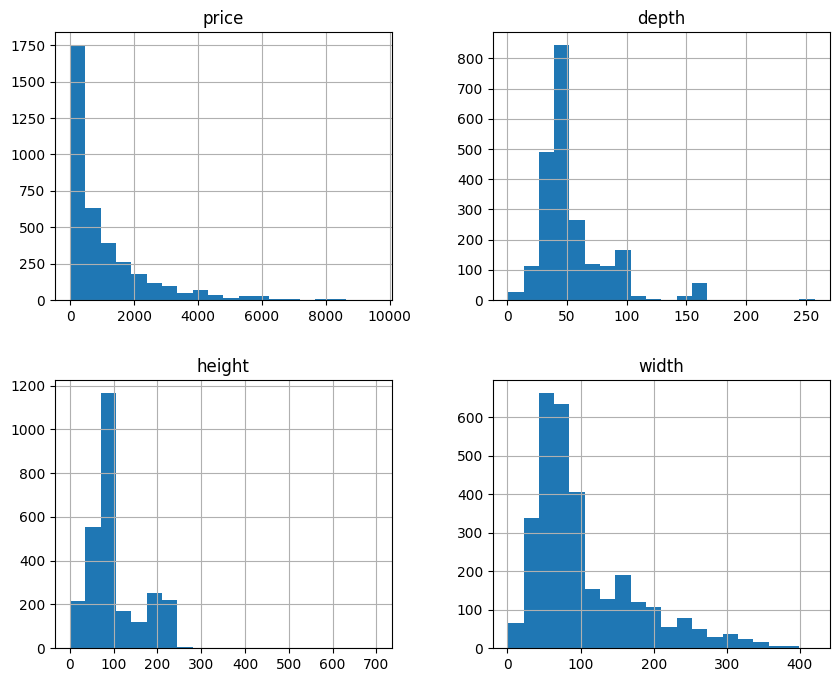

In [114]:
# Histograms for numerical attributes
df[['price', 'old_price', 'depth', 'height', 'width']].hist(bins=20, figsize=(10, 8))
plt.show()

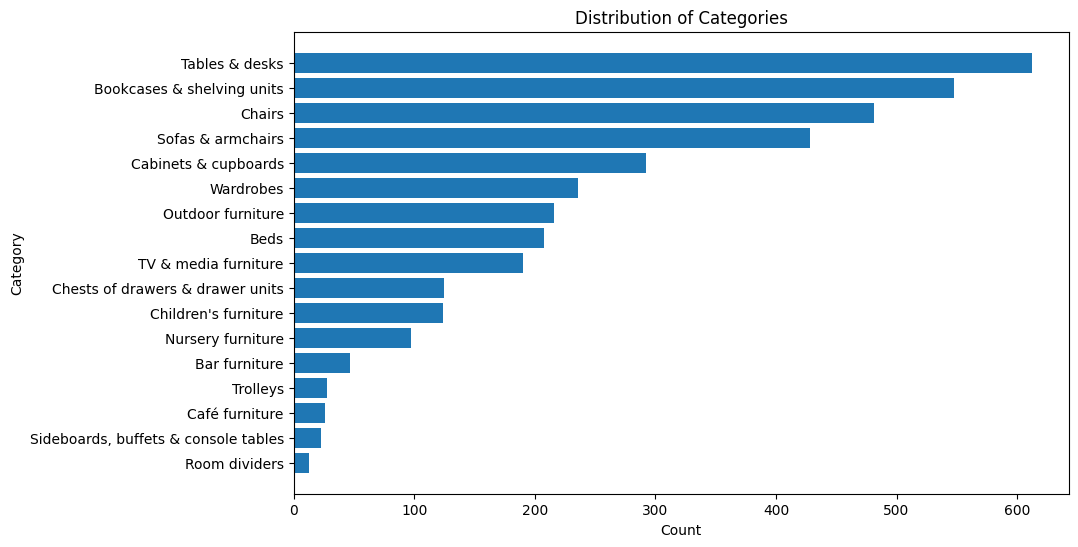

In [115]:
category_counts = df['category'].value_counts()

# Plot horizontal bar chart for category distribution
plt.figure(figsize=(10, 6))
plt.barh(category_counts.index, category_counts.values)
plt.xlabel("Count")
plt.ylabel("Category")
plt.title("Distribution of Categories")
plt.gca().invert_yaxis()
plt.show()

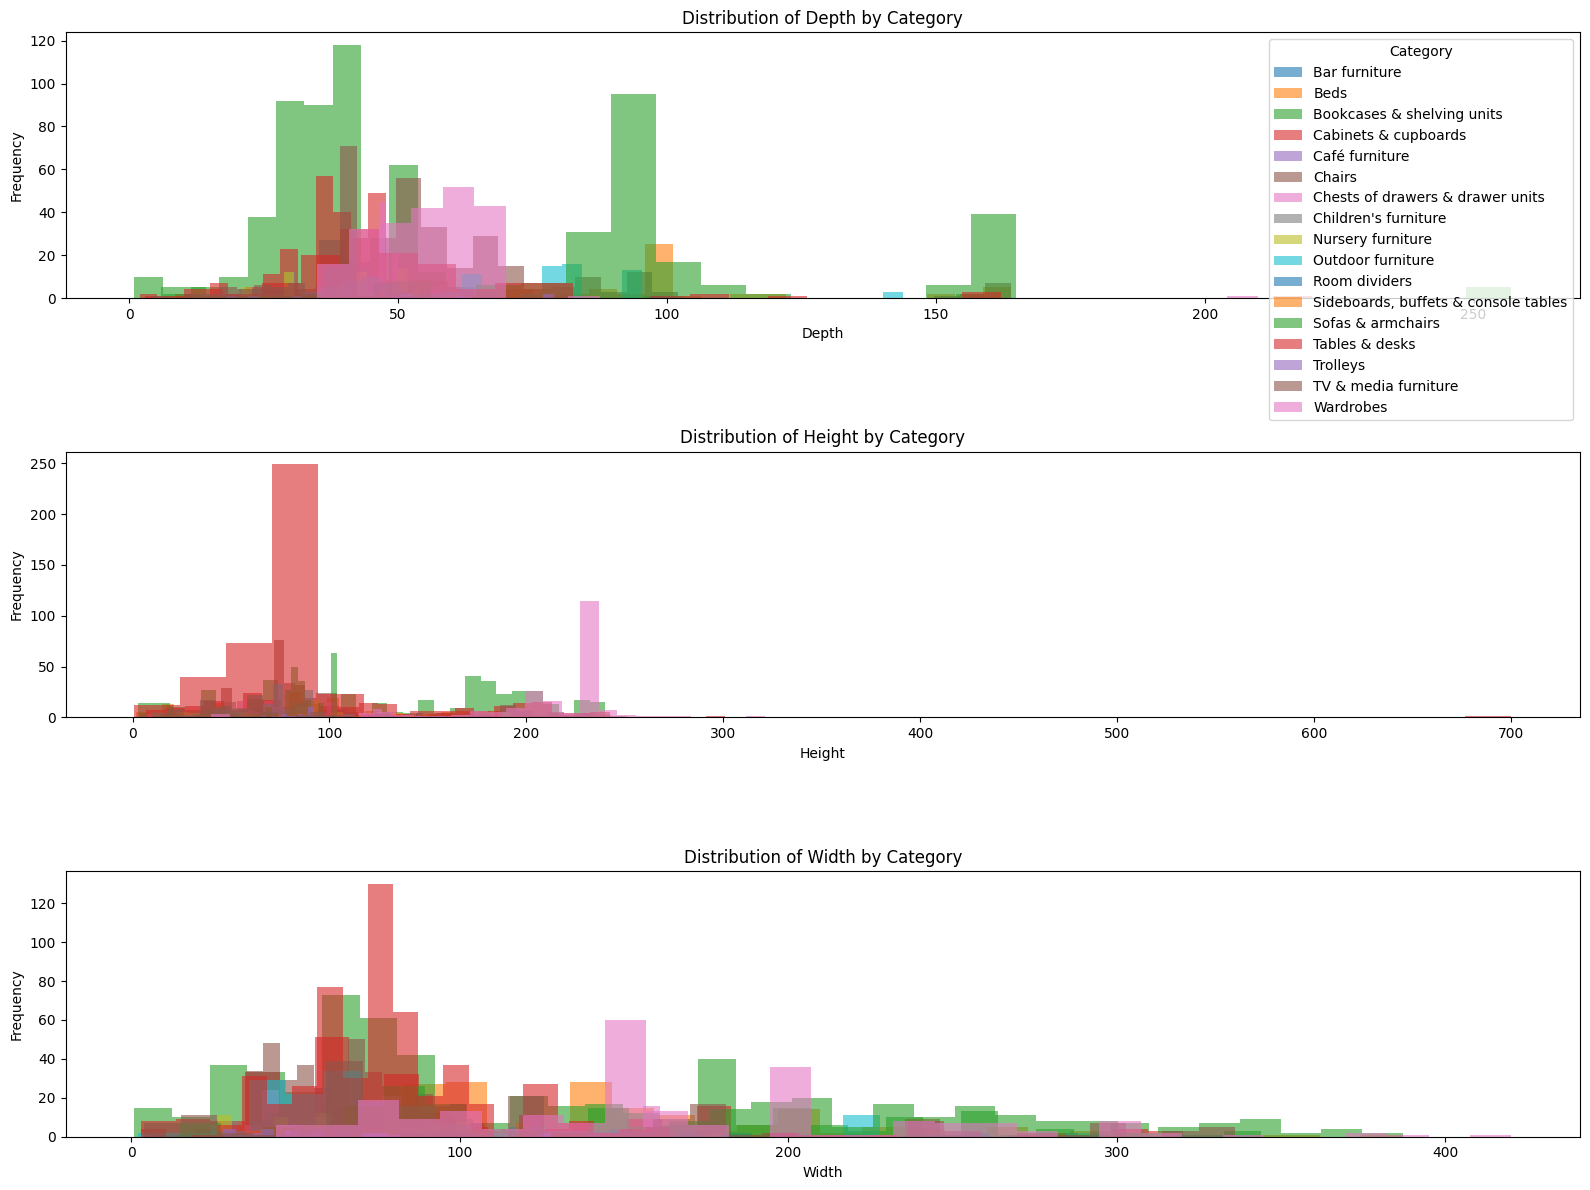

In [116]:
# Define the dimensions to plot
dimensions = ['depth', 'height', 'width']

# Set figure size and layout
fig, axes = plt.subplots(3, 1, figsize=(16, 12), sharex=False)

# Loop over dimensions and plot a stacked histogram for each
for i, dim in enumerate(dimensions):
    # Filter out NaN values for the current dimension
    data = df[['category', dim]].dropna()

    # Get unique categories
    categories = data['category'].unique()

    # Plot histograms for each category in a stacked manner
    for category in categories:
        category_data = data[data['category'] == category][dim]
        axes[i].hist(category_data, bins=30, alpha=0.6, label=category, stacked=True)

    # Set titles and labels
    axes[i].set_title(f'Distribution of {dim.capitalize()} by Category')
    axes[i].set_xlabel(dim.capitalize())
    axes[i].set_ylabel('Frequency')

# Add a legend to the first axis (showing categories)
axes[0].legend(title="Category", loc="upper right")
plt.tight_layout()
plt.show()

#### 3.2 Data Quality

In [117]:
# Amount of missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3694 entries, 0 to 3693
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            3694 non-null   int64  
 1   name               3694 non-null   object 
 2   category           3694 non-null   object 
 3   price              3694 non-null   float64
 4   old_price          3694 non-null   object 
 5   sellable_online    3694 non-null   bool   
 6   link               3694 non-null   object 
 7   other_colors       3694 non-null   object 
 8   short_description  3694 non-null   object 
 9   designer           3694 non-null   object 
 10  depth              2231 non-null   float64
 11  height             2706 non-null   float64
 12  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(1), object(7)
memory usage: 378.8+ KB


In [118]:
df_noNaN = df.dropna()
df_noNaN.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1899 entries, 3 to 3688
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            1899 non-null   int64  
 1   name               1899 non-null   object 
 2   category           1899 non-null   object 
 3   price              1899 non-null   float64
 4   old_price          1899 non-null   object 
 5   sellable_online    1899 non-null   bool   
 6   link               1899 non-null   object 
 7   other_colors       1899 non-null   object 
 8   short_description  1899 non-null   object 
 9   designer           1899 non-null   object 
 10  depth              1899 non-null   float64
 11  height             1899 non-null   float64
 12  width              1899 non-null   float64
dtypes: bool(1), float64(4), int64(1), object(7)
memory usage: 194.7+ KB


- Dropping all of the NaNs leads to a significant reduction in the number of observations
- Try to impute them later, by using the categorical mean or median

#### Extreme Values / Outliers

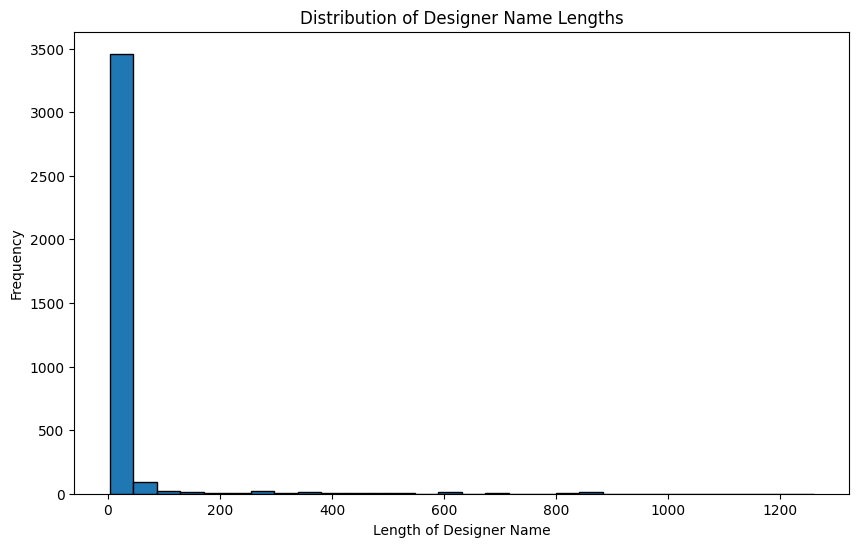

In [119]:
# Calculate the length of each entry in the 'designer' column
designer_lengths = df['designer'].str.len()

# Plot the distribution of designer name lengths
plt.figure(figsize=(10, 6))
plt.hist(designer_lengths, bins=30, edgecolor='black')
plt.xlabel("Length of Designer Name")
plt.ylabel("Frequency")
plt.title("Distribution of Designer Name Lengths")
plt.show()

In [120]:
# example of designer attribute issue
df[(df['designer'].str.len() > 1200)]['designer']

2206    104.246.21 KNOPPARP sofa is very durable thank...
Name: designer, dtype: object

- Key issue with designer attribute: Some contain descriptions of the items and not just designer names
- Manual inspect shows that the longest actual designer has a length of < 65 (multiple designers) and also that there don't seem to be any descriptions with a length shorter than 65. So 65 is a good threshold

In [121]:
df[(df['designer'].str.len() > 60) & (df['designer'].str.len() < 65)]

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
2516,9277782,VALLENTUNA,Sofas & armchairs,4448.0,"SR 5,560",True,https://www.ikea.com/sa/en/p/vallentuna-3-seat...,Yes,3-seat modular sofa with sofa-bed,IKEA of Sweden/Fredriksson/L Löwenhielm/Hillan...,NaN,84.0,266.0


In [122]:
# drop the rows with descriptions instead of designers
df = df[(df['designer'].str.len() < 65)] 

In [123]:
category_counts = df['designer'].value_counts()
category_counts

designer
IKEA of Sweden                                        828
Ehlén Johansson                                       161
Francis Cayouette                                     151
Ola Wihlborg                                          134
K Hagberg/M Hagberg                                   122
                                                     ... 
Henrik Preutz/Olle Lundberg                             1
IKEA of Sweden/Nike Karlsson/Eva Lilja Löwenhielm       1
Nike Karlsson/IKEA of Sweden/Eva Lilja Löwenhielm       1
Nike Karlsson/IKEA of Sweden                            1
IKEA of Sweden/Ehlén Johansson/Andreas Fredriksson      1
Name: count, Length: 281, dtype: int64

- QUESTION: How should we treat those rows with multiple designer? Likely split them up? And then later we one-hot encode them for the model?

In [124]:
# Inspect the height outliers
df[df['height']>300]

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
856,79291355,PLATSA,Cabinets & cupboards,1268.0,"SR 1,505",True,https://www.ikea.com/sa/en/p/platsa-storage-co...,No,"Storage combination, 80x42x30...",IKEA of Sweden,42.0,301.0,80.0
2884,80278273,HILVER,Tables & desks,100.0,No old price,True,https://www.ikea.com/sa/en/p/hilver-leg-cone-s...,No,"Leg cone-shaped, 70 cm",Chenyi Ke,NaN,700.0,NaN
3667,19305534,PLATSA,Wardrobes,1785.5,"SR 2,235",True,https://www.ikea.com/sa/en/p/platsa-wardrobe-w...,No,"Wardrobe with 5 doors+3 drawers, ...",Ola Wihlborg/IKEA of Sweden,42.0,321.0,NaN


In [125]:
# printing the whole description
for desc in df[df['height'] == 301.0]['short_description']:
    print(desc)
for desc in df[df['height'] == 321.0]['short_description']:
    print(desc)

        Storage combination,          80x42x301 cm
        Wardrobe with 5 doors+3 drawers,          175-205x42x321 cm


In [126]:
# cabinet and warderobe seem reasonable
# the table is a mistake, the description states 70cm 
df.loc[df['height'] == 700, 'height'] = 70

In [127]:
# inspect depth outlier 
df[df['depth']>200]
# seems reasonable 

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
2283,69254810,GRÖNLID,Sofas & armchairs,6575.0,No old price,True,https://www.ikea.com/sa/en/p/groenlid-u-shaped...,Yes,"U-shaped sofa, 6 seat",Ehlén Johansson/Francis Cayouette,252.0,104.0,327.0
2289,59193723,KIVIK,Sofas & armchairs,8295.0,No old price,True,https://www.ikea.com/sa/en/p/kivik-u-shaped-so...,Yes,"U-shaped sofa, 7-seat",Ola Wihlborg,257.0,83.0,368.0
2385,49252949,KIVIK,Sofas & armchairs,6895.0,No old price,True,https://www.ikea.com/sa/en/p/kivik-u-shaped-so...,Yes,"U-shaped sofa, 6 seat",Ola Wihlborg,257.0,83.0,328.0
2387,69285294,VIMLE,Sofas & armchairs,8395.0,No old price,True,https://www.ikea.com/sa/en/p/vimle-u-shaped-so...,Yes,"U-shaped sofa, 6 seat",Ehlén Johansson,249.0,83.0,327.0
2559,89256610,GRÖNLID,Sofas & armchairs,8900.0,No old price,True,https://www.ikea.com/sa/en/p/groenlid-u-shaped...,No,"U-shaped sofa, 6 seat",Francis Cayouette,252.0,104.0,327.0
3178,19046574,BEKANT,Tables & desks,5300.0,No old price,True,https://www.ikea.com/sa/en/p/bekant-desk-combi...,Yes,"Desk combination, 320x220 cm",K Malmvall/E Lilja Löwenhielm,220.0,NaN,NaN
3484,19300107,PAX,Wardrobes,5380.0,No old price,True,https://www.ikea.com/sa/en/p/pax-wardrobe-whit...,No,"Wardrobe, 276x211x236 cm",IKEA of Sweden/Ehlén Johansson,210.0,236.0,275.0


In [128]:
# check for duplicates 

duplicates = df[df['item_id'].duplicated(keep=False)]  # `keep=False` keeps all duplicates
duplicates = duplicates.sort_values(by='item_id')
duplicates

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
1918,91415,TROFAST,Nursery furniture,5.0,No old price,True,https://www.ikea.com/sa/en/p/trofast-lid-white...,No,"Lid, 20x28 cm",Studio Copenhagen,NaN,NaN,28.0
1834,91415,TROFAST,Children's furniture,5.0,No old price,True,https://www.ikea.com/sa/en/p/trofast-lid-white...,No,"Lid, 20x28 cm",Studio Copenhagen,NaN,NaN,28.0
2560,102065,LYCKSELE LÖVÅS,Sofas & armchairs,495.0,No old price,True,https://www.ikea.com/sa/en/p/lycksele-loevas-m...,No,"Mattress, 140x188 cm",IKEA of Sweden,NaN,NaN,NaN
151,102065,LYCKSELE LÖVÅS,Beds,495.0,No old price,True,https://www.ikea.com/sa/en/p/lycksele-loevas-m...,No,"Mattress, 140x188 cm",IKEA of Sweden,NaN,NaN,NaN
2687,105064,LIATORP,Tables & desks,445.0,No old price,True,https://www.ikea.com/sa/en/p/liatorp-console-t...,No,"Console table, 133x37 cm",Carina Bengs,NaN,75.0,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1853,99323614,SMÅGÖRA,Nursery furniture,370.0,No old price,True,https://www.ikea.com/sa/en/p/smagoera-changing...,No,Changing tbl/bookshelf w 1 shlf ut,IKEA of Sweden,40.0,91.0,60.0
29,99323925,STENSELE,Bar furniture,550.0,No old price,True,https://www.ikea.com/sa/en/p/stensele-bar-tabl...,No,"Bar table, 70x70 cm",Maja Ganszyniec,NaN,104.0,70.0
3028,99323925,STENSELE,Tables & desks,550.0,No old price,True,https://www.ikea.com/sa/en/p/stensele-bar-tabl...,No,"Bar table, 70x70 cm",Maja Ganszyniec,NaN,104.0,70.0
2737,99902661,VITTSJÖ,Tables & desks,609.0,No old price,True,https://www.ikea.com/sa/en/p/vittsjoe-shelving...,No,"Shelving unit with laptop table, ...",Johan Kroon,36.0,NaN,202.0


##### How do we deal with duplicates and mutliple designers? 
- It seems that duplicated `item_id` values refer to items that belong to multiple categories. A possible approach could be to handle this later during one-hot encoding. After encoding the `category` attribute, we could group by the `item_id` and merge rows, ensuring that each item is marked for all relevant categories.
- This approach could also address the issue of items with multiple designers. First, we would split the `designer` attribute into a list of designers, then use `explode()` to expand the dataset so that each designer has its own row. After one-hot encoding and merging by `item_id`, each item would have a `1` for every designer associated with it
- The question is do we even want to use one-hot encoding. It would increase the feature space a lot (+17 categories and +111 unique designers). If not we'd have to make other decisions on how to handle the duplicate `item_id` and the multi-valued `designer` attributes

In [107]:
# sample code on how to split up the designer attribute and 'explode' the dataset
test = df.copy()
test['designer'] = test['designer'].str.split('/')
test = test.explode('designer').reset_index(drop=True)

# how to one-hot encode
test_one_hot = pd.get_dummies(test, columns=['category', 'designer'])

# groupy by item_id and merge
test_one_hot_merged = test_one_hot.groupby('item_id').agg('max').reset_index()

#### 3.3 Information on our goals

Based on user selected items, we will use a KNN approach to find and recommend similar items. The recommendations will be visualized with comparisons on attributes like prices and dimensions, helping users quickly identify suitable products.

**Data Preparation Steps:**

1. **Impute Missing Values**: Missing values in `depth`, `width` and `height` will be imputed within each category, using the median to adress skewness
2. **Addressing Skewness**: Due to a right-skewed distribution, particularly in prices, we'll apply appropriate transformations (likely log) to price and dimensions, followed by scaling, to improve KNN performance in distance-based similarity.
3. **Encoding Categorical Attributes**: Categorical features, like `category` and `designer`, will be encoded to ensure compatibility with KNN.
4. **Balancing Categories**: To mitigate bias toward overrepresented categories, we'll consider a weighted KNN approach or sampling techniques for balance.